   defect_id  product_id defect_type defect_date defect_location  severity  \
0          1          15  Structural  2024-06-06       Component     Minor   
1          2           6  Functional  2024-04-26       Component     Minor   
2          3          84  Structural  2024-02-15        Internal     Minor   
3          4          10  Functional  2024-03-28        Internal  Critical   
4          5          14    Cosmetic  2024-04-26       Component     Minor   

   inspection_method  repair_cost defect_month  
0  Visual Inspection       245.47      2024-06  
1  Visual Inspection        26.87      2024-04  
2  Automated Testing       835.81      2024-02  
3  Automated Testing       444.47      2024-03  
4     Manual Testing       823.64      2024-04  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   defect_id          1000 non-nul

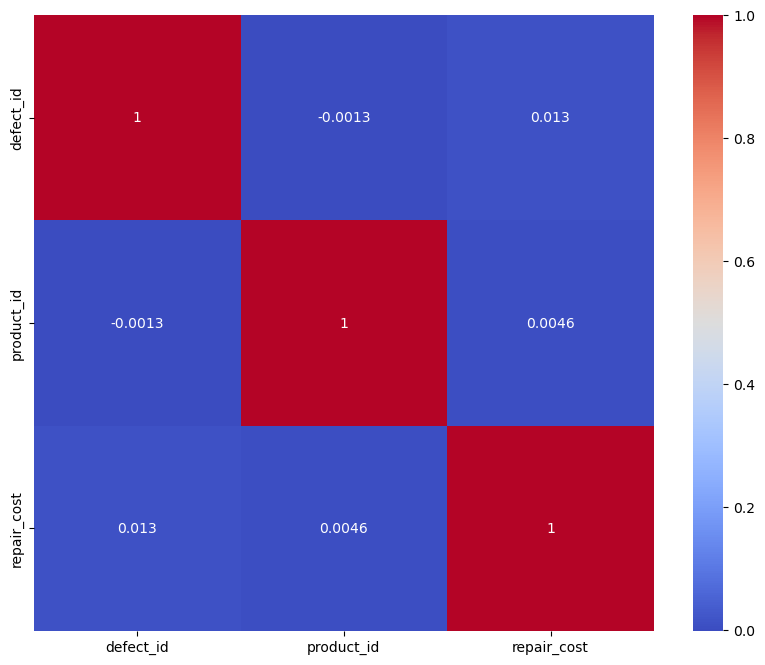

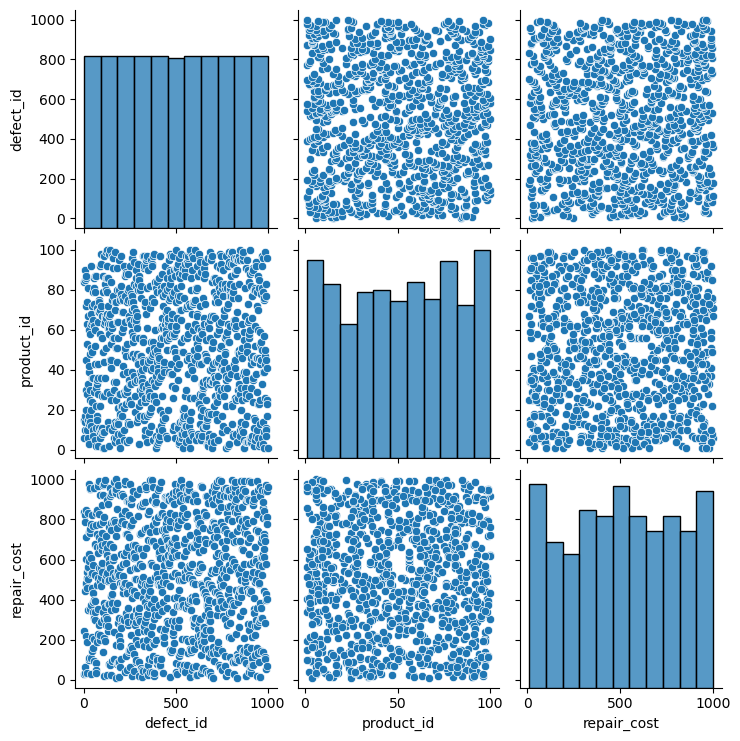

MAE: 254.42585710324917
MSE: 87531.34464220935
R^2:  -0.02152676072223736


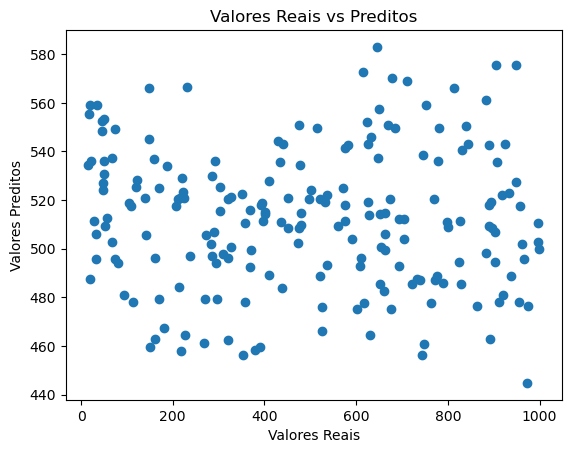

In [3]:
# Importar bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Carregar os dados
import os
import pandas as pd

current_dir = os.getcwd()
path_file = os.path.join(current_dir, "clean_data.csv")

# Ler os dados do CSV com encoding especificado
data = pd.read_csv(path_file, encoding='latin1')

# Explorar os dados
print(data.head())
print(data.info())
print(data.describe())

# Selecionar apenas colunas numéricas
numeric_data = data.select_dtypes(include=[np.number])

# Visualizar correlações
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

sns.pairplot(data)
plt.show()

# Selecionar características e alvo
X = data[['defect_type', 'defect_location', 'severity', 'inspection_method', 'defect_month']]
y = data['repair_cost']

# Pré-processamento (codificação de variáveis categóricas)
X = pd.get_dummies(X, drop_first=True)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'MAE: {mae}')
print(f'MSE: {mse}')

# Desempenho no conjunto de testes
R = r2_score(y_test, y_pred)
print("R^2: ", R)

# Visualizar resultados
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Reais vs Preditos')
plt.show()

Erro quadratico medio (MSE):  6086.6


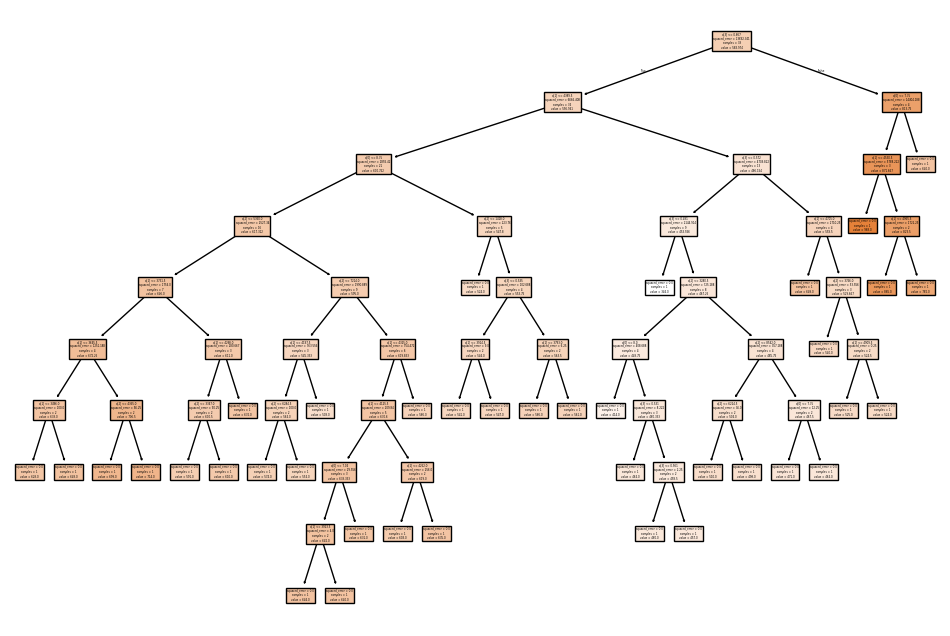

In [3]:
import pandas as pd
import os

current_dir = os.getcwd()
path_file = os.path.join(current_dir, "consumption_of_petrol.csv")

# Ler os dados do CSV com encoding especificado
df_petr = pd.read_csv(path_file, encoding='latin1')

df_petr.head()

X = df_petr.drop('Petrol_Consumption', axis=1)
y = df_petr['Petrol_Consumption']

X.head()

y.head()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.tree import DecisionTreeRegressor
regres = DecisionTreeRegressor()
regres.fit(X_train, y_train)

y_pred = regres.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('Erro quadratico medio (MSE): ', mse)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(regres, filled = True)
plt.show()

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# # Codificar variáveis categóricas
# label_encoders = {}
# for column in ['defect_type', 'defect_location', 'inspection_method', 'severity']:
#     le = LabelEncoder()
#     data[column] = le.fit_transform(data[column])
#     label_encoders[column] = le

# # Seleção de recursos e alvo
# X = data.drop(columns=['severity', 'defect_id', 'defect_date'])  # Excluir colunas irrelevantes
# y = data['severity']

# # Normalizar os dados
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Divisão em treino e teste
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# # Treinamento do modelo SVM
# svm_model = SVC(kernel='linear', probability=True, random_state=42)
# svm_model.fit(X_train, y_train)

# # Previsões e avaliação
# y_train_pred = svm_model.predict(X_train)
# y_test_pred = svm_model.predict(X_test)

# train_accuracy = accuracy_score(y_train, y_train_pred)
# test_accuracy = accuracy_score(y_test, y_test_pred)

# print(f"Acurácia no treino: {train_accuracy:.2f}")
# print(f"Acurácia no teste: {test_accuracy:.2f}")

# # Relatório de classificação
# classification_rep = classification_report(y_test, y_test_pred, target_names=label_encoders['severity'].classes_)
# print(classification_rep)

# # Matriz de confusão
# conf_matrix = confusion_matrix(y_test, y_test_pred)
# ConfusionMatrixDisplay(conf_matrix, display_labels=label_encoders['severity'].classes_).plot(cmap='viridis', xticks_rotation='vertical')
# plt.title('Matriz de Confusão')
# plt.show()